In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('Mall_Customers.csv')

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Univariate analysis

In [11]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

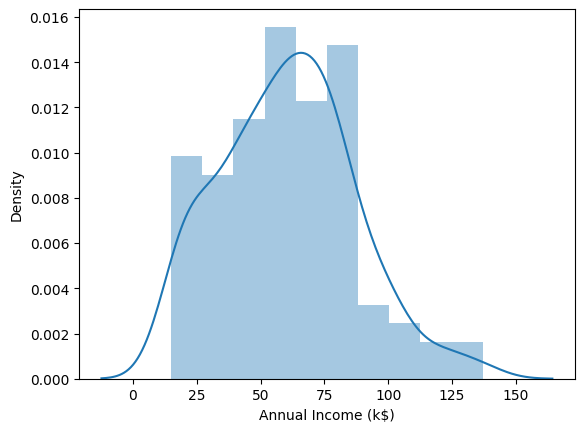

In [12]:
sns.distplot(df['Annual Income (k$)'])

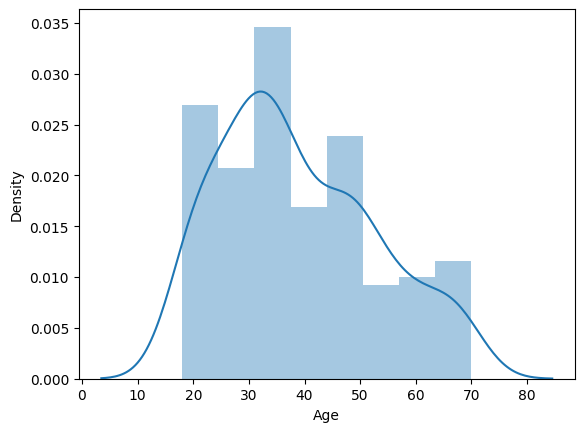

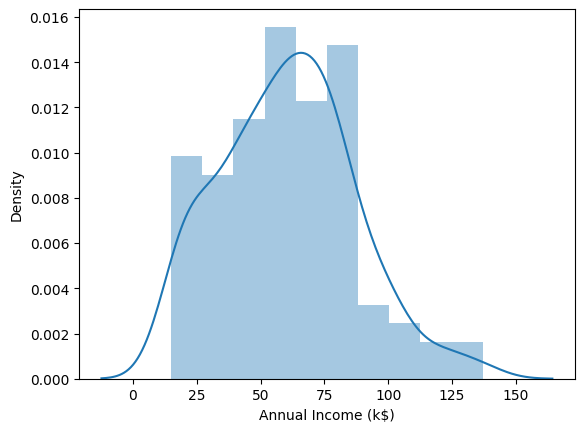

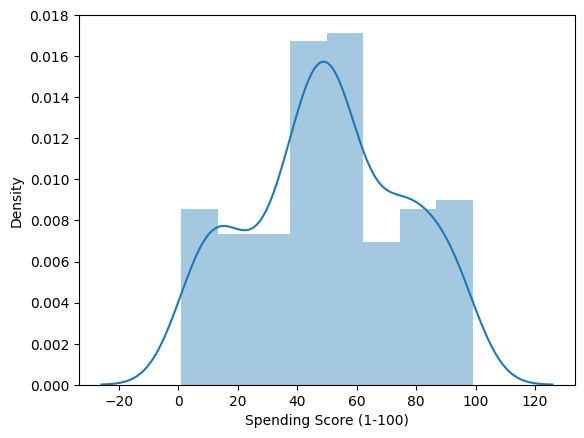

In [15]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

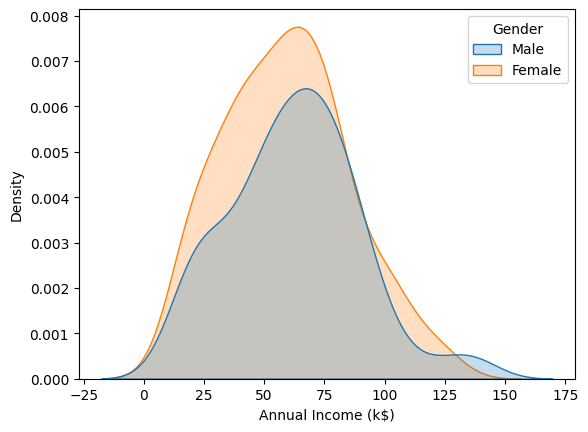

In [22]:
sns.kdeplot(x=df['Annual Income (k$)'], shade=True,hue=df['Gender'])

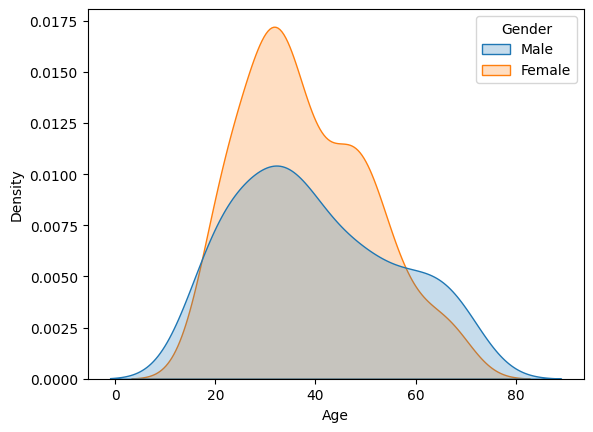

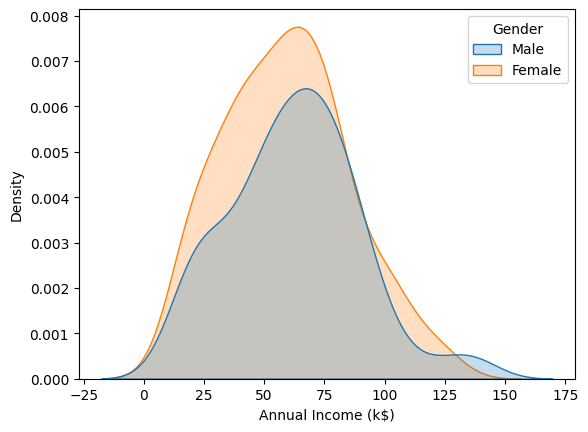

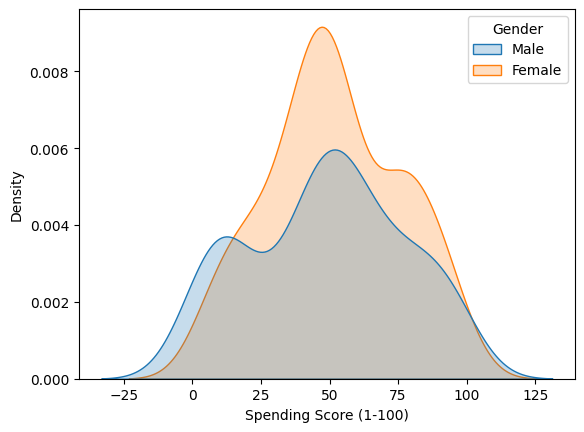

In [23]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.kdeplot(x=df[i], shade=True, hue=df['Gender'])

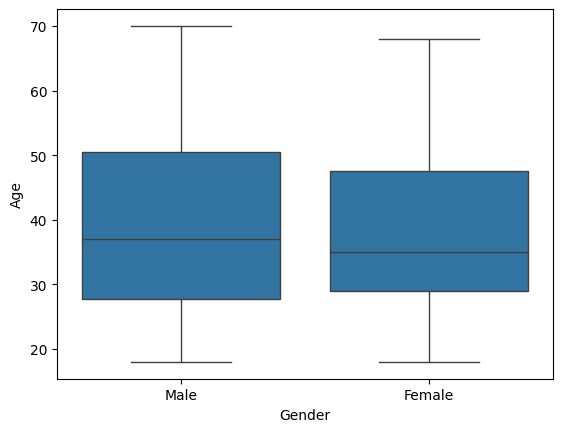

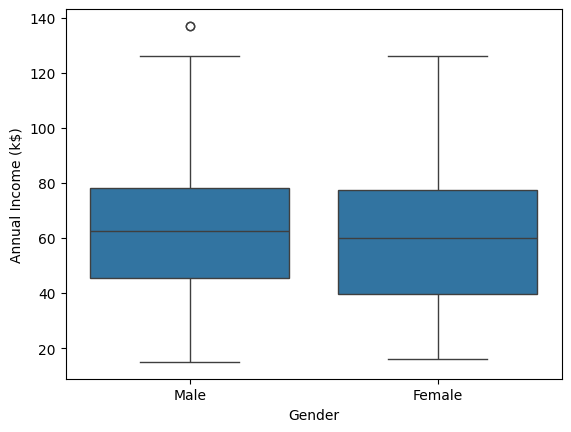

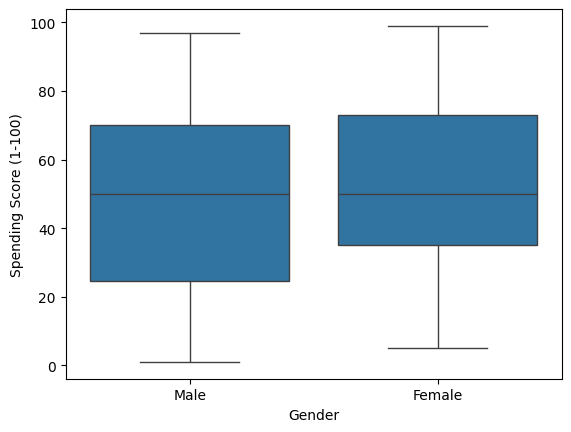

In [24]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']
for i in columns:
  plt.figure()
  sns.boxplot(data = df, x = df['Gender'], y = df[i])

In [28]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


Bivariate analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

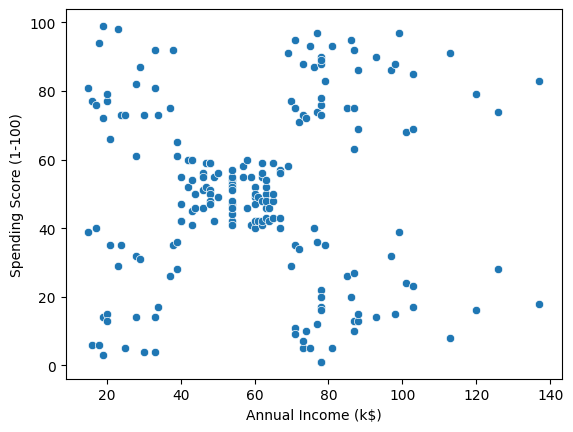

In [29]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

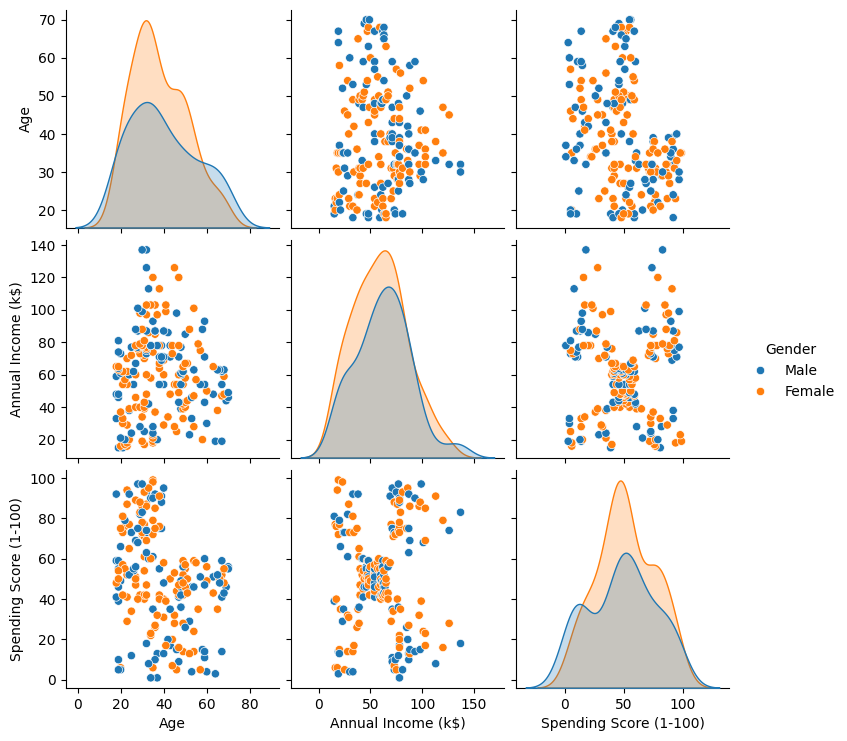

In [32]:
# df = df.drop(['CustomerID'], axis=1)
sns.pairplot(df, hue='Gender')

In [42]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [44]:
df.select_dtypes(include=['number']).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

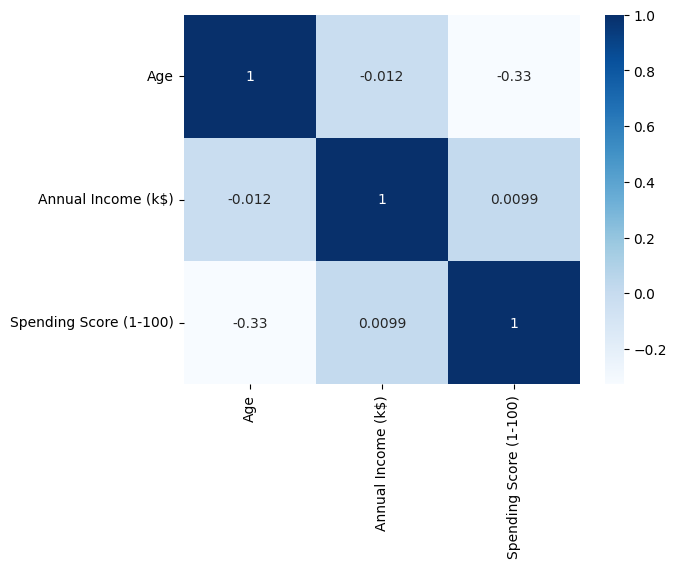

In [45]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='Blues')

Clustering (univariate, bivariate and multivariate)

In [58]:
clusteringincome = KMeans(n_clusters=3)
clusteringincome.fit(df[['Annual Income (k$)']])
clusteringincome.labels_
df['Income Cluster'] = clusteringincome.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,2
3,Female,23,16,77,2
4,Female,31,17,40,2


In [59]:
df['Income Cluster'].value_counts()

,count
Income Cluster,
0,92
2,72
1,36


In [60]:
clusteringincome.inertia_

23528.152173913048

In [61]:
inertia_score = []
for i in range(1,11):
  clusteringincome = KMeans(n_clusters=i)
  clusteringincome.fit(df[['Annual Income (k$)']])
  inertia_score.append(clusteringincome.inertia_)

In [62]:
inertia_score

[137277.2800000002,
 48660.88888888887,
 25341.285871863212,
 13556.82927489177,
 8667.679614837503,
 5134.40362434413,
 3941.41636141636,
 3324.6283128636073,
 2861.166544566546,
 1977.1064102564108]

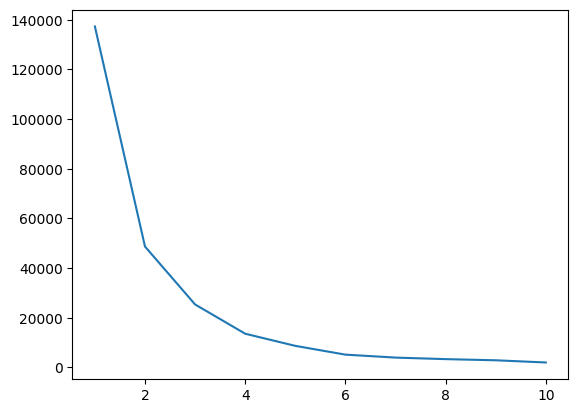

In [63]:
plt.plot(range(1,11), inertia_score)

In [64]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster'],
      dtype='object')

In [65]:
df.groupby(['Income Cluster'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,37.833333,99.888889,50.638889
2,38.930556,33.027778,50.166667


In [82]:
#bivariate clustering

clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and income Cluster'] = clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and income Cluster
0,Male,19,15,39,2,0
1,Male,21,15,81,2,3
2,Female,20,16,6,2,0
3,Female,23,16,77,2,3
4,Female,31,17,40,2,0


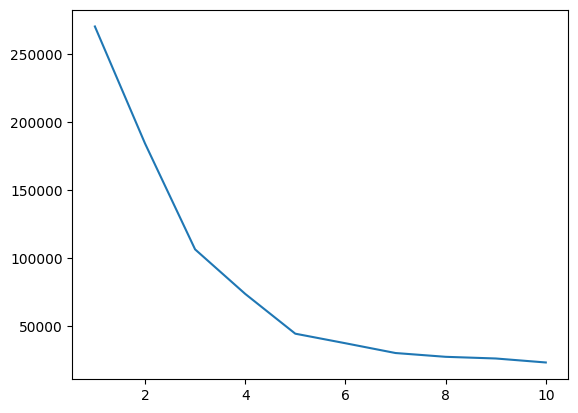

In [83]:
inertia_score = []
for i in range(1,11):
  clustering2scree = KMeans(n_clusters=i)
  clustering2scree.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
  inertia_score.append(clustering2scree.inertia_)

plt.plot(range(1,11), inertia_score)

In [84]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,26.304348,20.913043
1,86.538462,82.128205
2,55.296296,49.518519
3,25.727273,79.363636
4,88.200000,17.114286


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

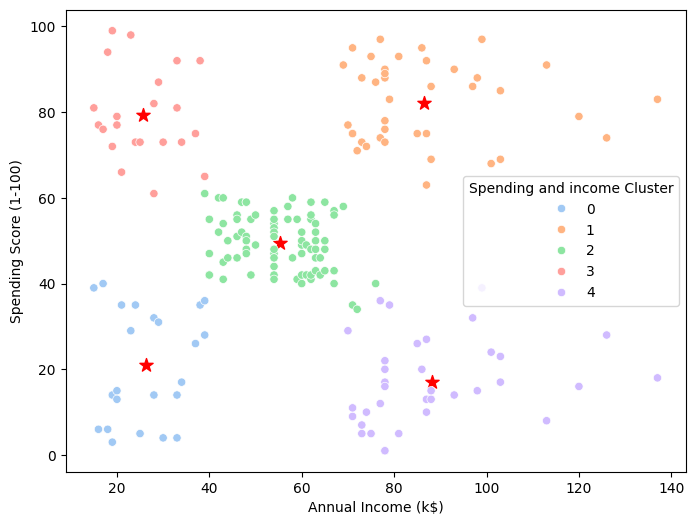

In [107]:
plt.figure(figsize=(8,6))
plt.scatter(x=centers['x'], y=centers['y'], s=100, c='red', marker='*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and income Cluster', palette='pastel')

In [87]:
pd.crosstab(df['Spending and income Cluster'], df['Gender'], normalize='index')

Gender,Female,Male
Spending and income Cluster,,
0,0.608696,0.391304
1,0.538462,0.461538
2,0.592593,0.407407
3,0.590909,0.409091
4,0.457143,0.542857


In [88]:
df.groupby(['Spending and income Cluster'])[['Age', 'Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and income Cluster,,,
0,45.217391,26.304348,20.913043
1,32.692308,86.538462,82.128205
2,42.716049,55.296296,49.518519
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


Cluster 1 has low age, high annual income, and high spending score - so they could be our target market!!!

In [90]:
#multivariate clustering
from sklearn.preprocessing import StandardScaler

In [91]:
scale = StandardScaler()

In [92]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and income Cluster
0,Male,19,15,39,2,0
1,Male,21,15,81,2,3
2,Female,20,16,6,2,0
3,Female,23,16,77,2,3
4,Female,31,17,40,2,0


In [95]:
dff = pd.get_dummies(df, drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and income Cluster,Gender_Male
0,19,15,39,2,0,True
1,21,15,81,2,3,True
2,20,16,6,2,0,False
3,23,16,77,2,3,False
4,31,17,40,2,0,False


In [96]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Income Cluster',
       'Spending and income Cluster', 'Gender_Male'],
      dtype='object')

In [99]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [101]:
dff = pd.DataFrame(scale.fit_transform(dff))
dff

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


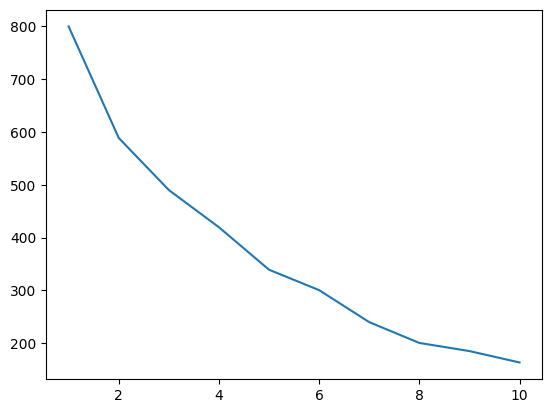

In [102]:
inertia_score = []
for i in range(1,11):
  clustering3 = KMeans(n_clusters=i)
  clustering3.fit(dff)
  inertia_score.append(clustering3.inertia_)

plt.plot(range(1,11), inertia_score)